In [270]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [271]:
df = pd.read_csv("PB Sales Chicago.csv")
df[:5]

,IRI_KEY,WEEK,VEND,ITEM,UNITS,DOLLARS,F,D,PR,UPC,EST_ACV,VOL_EQ,TYPE,TEXTURE,FLAVOR
0,234212,1635,45300,549,14,26.86,NONE,0,1,00-01-45300-00549,36.875,1.0187,PEANUT BUTTER,CREAMY,REGULAR
1,234212,1635,45300,540,6,12.94,NONE,0,0,00-01-45300-00540,36.875,1.0187,PEANUT BUTTER,CRUNCHY,REGULAR
2,234212,1635,51500,55,2,6.78,NONE,0,0,00-01-51500-00055,36.875,1.1250,PEANUT BUTTER COMBO,CREAMY,MISSING
3,234212,1635,51500,65,6,20.34,NONE,0,0,00-01-51500-00065,36.875,1.1250,PEANUT BUTTER COMBO,CREAMY,REGULAR
4,234212,1635,51500,24128,50,99.50,NONE,0,1,00-02-51500-24128,36.875,1.1250,PEANUT BUTTER,CREAMY,REGULAR


Checking the data first


In [272]:
print("checking for data type \n")
print(df.dtypes)
print("\n checking the general statistics of some columns \n")
print(df.describe())
print("\n checking the missing values \n")
print(df.isnull().sum())
print("\n checking for unique counts in each column \n")
df.apply(lambda x: x.nunique(), axis = 0)

checking for data type 

IRI_KEY      int64
WEEK         int64
VEND         int64
ITEM         int64
UNITS        int64
DOLLARS    float64
F           object
D            int64
PR           int64
UPC         object
EST_ACV    float64
VOL_EQ     float64
TYPE        object
TEXTURE     object
FLAVOR      object
dtype: object

 checking the general statistics of some columns 

            IRI_KEY          WEEK          VEND          ITEM         UNITS  \
count  4.317500e+04  43175.000000  43175.000000  43175.000000  43175.000000   
mean   8.376674e+05   1660.589647  55218.075646  21028.434812     11.968384   
std    3.888589e+05     15.011369  17071.339647  19956.671589     21.956201   
min    2.342120e+05   1635.000000  33776.000000     50.000000      1.000000   
25%    2.730910e+05   1648.000000  48001.000000    681.000000      3.000000   
50%    1.130089e+06   1661.000000  51500.000000  24163.000000      6.000000   
75%    1.130156e+06   1674.000000  51500.000000  27068.000000     13.00

IRI_KEY      35
WEEK         52
VEND          5
ITEM         38
UNITS       263
DOLLARS    7190
F             5
D             3
PR            2
UPC          38
EST_ACV      35
VOL_EQ        9
TYPE          3
TEXTURE       6
FLAVOR        2
dtype: int64

EST_ACV : estimated all commodity volume which represents the total volume of estimated annual sales in a particular store 
UPC : Unique product number 
rest columns are explained in the Time Series repository

In [273]:
## Dropping IRI_KEY as it will not be used in forecasting of pb sales 
df4 = df.copy() 
df = df.drop('IRI_KEY', axis = 1)
df.columns

Index(['WEEK', 'VEND', 'ITEM', 'UNITS', 'DOLLARS', 'F', 'D', 'PR', 'UPC',
       'EST_ACV', 'VOL_EQ', 'TYPE', 'TEXTURE', 'FLAVOR'],
      dtype='object')

In [274]:
##Making the prediction column and adding extra columns on the basis given by the assignment 
import math as mt
##Making an intermediate metric called "Price per OZ" which is a widely used metric in Supply Chain
df['PPOZ'] = df['DOLLARS']/(df['UNITS']*df['VOL_EQ']*16)
df['LPU'] = df['PPOZ'].apply(lambda x: mt.log(x))
df['LSA_abs'] = df['UNITS']*df['VOL_EQ']*16
df['LSA'] = df["LSA_abs"].apply(lambda x: mt.log(x))

df = df.drop(['PPOZ','LSA_abs'], axis = 1)
df[:5]

,WEEK,VEND,ITEM,UNITS,DOLLARS,F,D,PR,UPC,EST_ACV,VOL_EQ,TYPE,TEXTURE,FLAVOR,LPU,LSA
0,1635,45300,549,14,26.86,NONE,0,1,00-01-45300-00549,36.875,1.0187,PEANUT BUTTER,CREAMY,REGULAR,-2.139535,5.430173
1,1635,45300,540,6,12.94,NONE,0,0,00-01-45300-00540,36.875,1.0187,PEANUT BUTTER,CRUNCHY,REGULAR,-2.022552,4.582875
2,1635,51500,55,2,6.78,NONE,0,0,00-01-51500-00055,36.875,1.1250,PEANUT BUTTER COMBO,CREAMY,MISSING,-1.669542,3.583519
3,1635,51500,65,6,20.34,NONE,0,0,00-01-51500-00065,36.875,1.1250,PEANUT BUTTER COMBO,CREAMY,REGULAR,-1.669542,4.682131
4,1635,51500,24128,50,99.50,NONE,0,1,00-02-51500-24128,36.875,1.1250,PEANUT BUTTER,CREAMY,REGULAR,-2.202237,6.802395


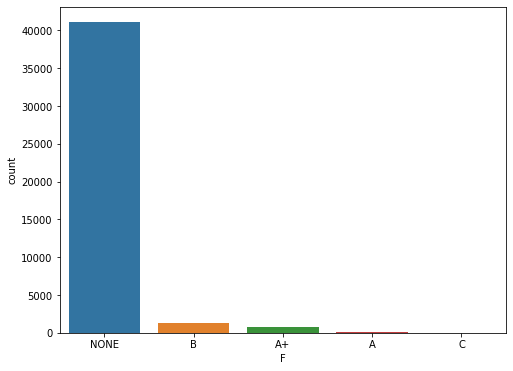

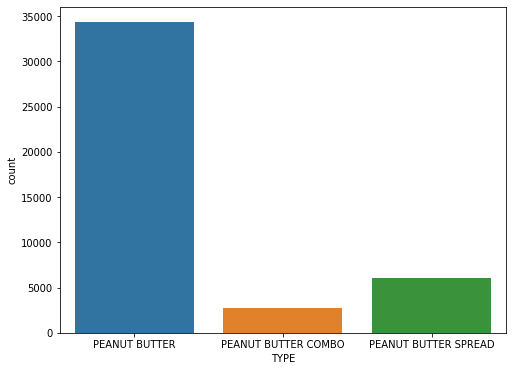

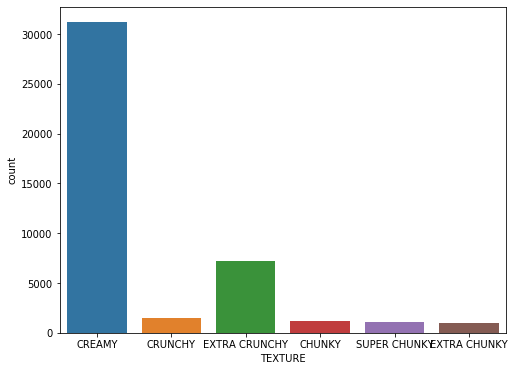

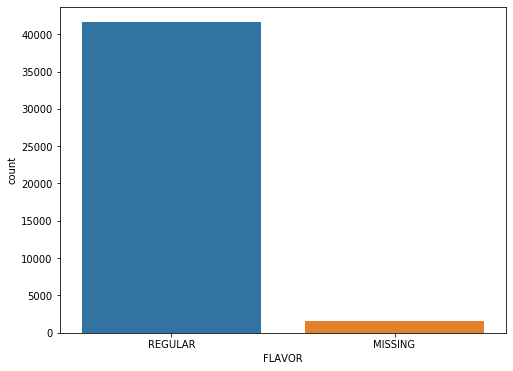

In [275]:

##Checking count of categorical columns
import matplotlib.pyplot as plt 


plt.figure(figsize = (8,6))
sns.countplot(x = df["F"])
(plt.show())
plt.figure(figsize = (8,6))
sns.countplot( x = df['TYPE'])
plt.show()
plt.figure(figsize = (8,6))
sns.countplot(x = df['TEXTURE'])
plt.show()
plt.figure(figsize = (8,6))
sns.countplot(x = df['FLAVOR'])
plt.show()

Many of these nominal metrics are highly skewed and thus one may argue that we can remove variables like advertising unit "F"
However, there dummification values may explain the variation in the sales. Also, biz viz it is intuitive that advertisement generally leads up to higher sales, thus deciding to keep these metrics and let the model decide upon its importance itself 

One more thing which I would like to highlight here is people generally missinterpret this as voilation to the assumption of linear regression of normality. However, that assumption is mainly wrt to the error terms or residuals of the linear regression and this skewness does not voilates any assumption 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E1889A5C0>,
      dtype=object)

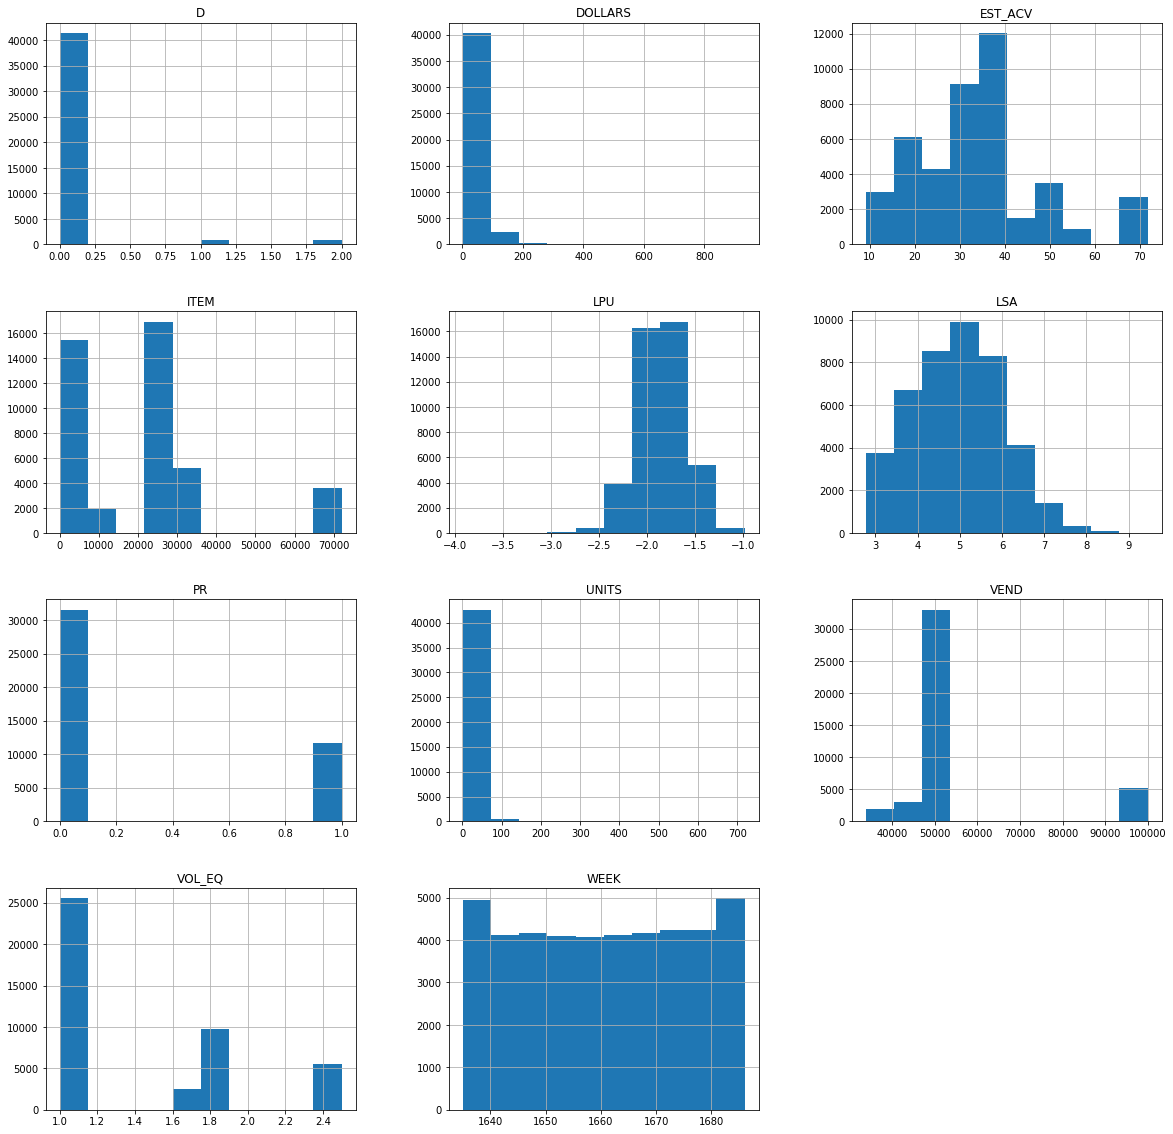

In [276]:
##Checking for outliers in numerical columns 
dfcorrind = df.dtypes
dfcorrind = dfcorrind[dfcorrind != 'object']
dfcorr = df.copy()
dfcorr = dfcorr[dfcorrind.index]
dfcorr.hist(figsize = (20,20))


We can see that for units and dollars, there are some values going more towards 800 mark and thus we will be removing that. Vend column is just the numerical id and we wont be using it in our analysis 

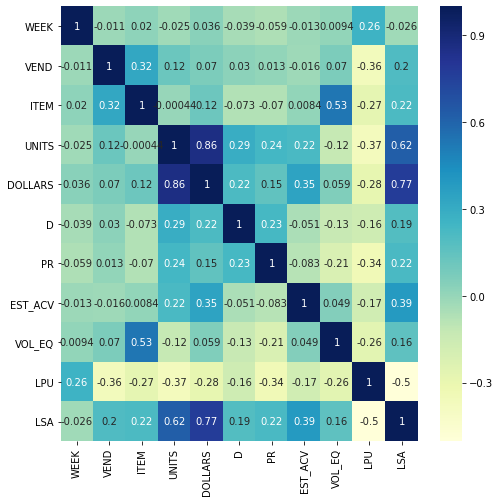

In [277]:
## Checking correlations of some of the values 
#df2 = df.apply(lambda x: x.dtype != 'object', axis = 0)
#df2[:10]
df2 = df.dtypes
df2 = df2[df2 != 'O']
df2
# Creating a copyof df for reproducibility purpose
df5 = df.copy()
dfc = df[df2.index]




## plotting the figures
plt.figure(figsize = (8,8))
sns.heatmap(dfc.corr(),cmap = 'YlGnBu', linecolor = 'blue', annot = True)
plt.show()

In [278]:
##As we can see LSA is correlated with units and dollars. Adding 4 lags as well as trend col in the data 


df6lag1 = df[['LSA','UNITS','DOLLARS','VOL_EQ','LPU']]
df6lag1.columns = ['LSA_lag1','UNITS_lag1','DOLLARS_lag1','VOL_EQ_lag1','LPU_lag1']
df6lag1.index = df6lag1.index+1

df6lag2 = df[['LSA','UNITS','DOLLARS','VOL_EQ','LPU']]
df6lag2.columns = ['LSA_lag2','UNITS_lag2','DOLLARS_lag2','VOL_EQ_lag2','LPU_lag2']
df6lag2.index = df6lag2.index+2



df6lag3 = df[['LSA','UNITS','DOLLARS','VOL_EQ','LPU']]
df6lag3.columns = ['LSA_lag3','UNITS_lag3','DOLLARS_lag3','VOL_EQ_lag3','LPU_lag3']
df6lag3.index = df6lag3.index+3

df6lag4 = df[['LSA','UNITS','DOLLARS','VOL_EQ','LPU']]
df6lag4.columns = ['LSA_lag4','UNITS_lag4','DOLLARS_lag4','VOL_EQ_lag4','LPU_lag4']
df6lag4.index = df6lag4.index+4



df8 = pd.concat([df,df6lag1,df6lag2,df6lag3,df6lag4], axis = 1)
#df8['trend'] = df8.index
df8.dropna(inplace= True)

df = df8.copy()

df

,WEEK,VEND,ITEM,UNITS,DOLLARS,F,D,PR,UPC,EST_ACV,...,LSA_lag3,UNITS_lag3,DOLLARS_lag3,VOL_EQ_lag3,LPU_lag3,LSA_lag4,UNITS_lag4,DOLLARS_lag4,VOL_EQ_lag4,LPU_lag4
4,1635.0,51500.0,24128.0,50.0,99.50,NONE,0.0,1.0,00-02-51500-24128,36.875,...,4.582875,6.0,12.94,1.0187,-2.022552,5.430173,14.0,26.86,1.0187,-2.139535
5,1635.0,51500.0,25544.0,34.0,69.66,NONE,0.0,1.0,00-01-51500-25544,36.875,...,3.583519,2.0,6.78,1.1250,-1.669542,4.582875,6.0,12.94,1.0187,-2.022552
6,1635.0,51500.0,24177.0,15.0,59.85,NONE,0.0,0.0,00-01-51500-24177,36.875,...,4.682131,6.0,20.34,1.1250,-1.669542,3.583519,2.0,6.78,1.1250,-1.669542
7,1635.0,51500.0,25499.0,6.0,31.74,NONE,0.0,0.0,00-01-51500-25499,36.875,...,6.802395,50.0,99.50,1.1250,-2.202237,4.682131,6.0,20.34,1.1250,-1.669542
8,1635.0,51500.0,24320.0,12.0,23.88,NONE,0.0,1.0,00-01-51500-24320,36.875,...,6.416732,34.0,69.66,1.1250,-2.173106,6.802395,50.0,99.50,1.1250,-2.202237
9,1635.0,51500.0,24322.0,12.0,47.88,NONE,0.0,0.0,00-01-51500-24322,36.875,...,6.040255,15.0,59.85,1.7500,-1.948413,6.416732,34.0,69.66,1.1250,-2.173106
10,1635.0,51500.0,24135.0,30.0,60.70,NONE,0.0,1.0,00-01-51500-24135,36.875,...,5.480639,6.0,31.74,2.5000,-2.023061,6.040255,15.0,59.85,1.7500,-1.948413
11,1635.0,51500.0,24163.0,6.0,23.94,NONE,0.0,0.0,00-01-51500-24163,36.875,...,5.375278,12.0,23.88,1.1250,-2.202237,5.480639,6.0,31.74,2.5000,-2.023061
12,1635.0,51500.0,72002.0,8.0,42.32,NONE,0.0,0.0,00-01-51500-72002,36.875,...,5.817111,12.0,47.88,1.7500,-1.948413,5.375278,12.0,23.88,1.1250,-2.202237
13,1635.0,51500.0,72000.0,25.0,49.75,NONE,0.0,1.0,00-01-51500-72000,36.875,...,6.291569,30.0,60.70,1.1250,-2.185625,5.817111,12.0,47.88,1.7500,-1.948413


In [279]:
##droping the unit and dollars column 
df = df8.copy()
df = df.drop(['UNITS','VEND','ITEM','DOLLARS','VOL_EQ','LPU','WEEK'], axis = 1)
df.columns

Index(['F', 'D', 'PR', 'UPC', 'EST_ACV', 'TYPE', 'TEXTURE', 'FLAVOR', 'LSA',
       'LSA_lag1', 'UNITS_lag1', 'DOLLARS_lag1', 'VOL_EQ_lag1', 'LPU_lag1',
       'LSA_lag2', 'UNITS_lag2', 'DOLLARS_lag2', 'VOL_EQ_lag2', 'LPU_lag2',
       'LSA_lag3', 'UNITS_lag3', 'DOLLARS_lag3', 'VOL_EQ_lag3', 'LPU_lag3',
       'LSA_lag4', 'UNITS_lag4', 'DOLLARS_lag4', 'VOL_EQ_lag4', 'LPU_lag4'],
      dtype='object')

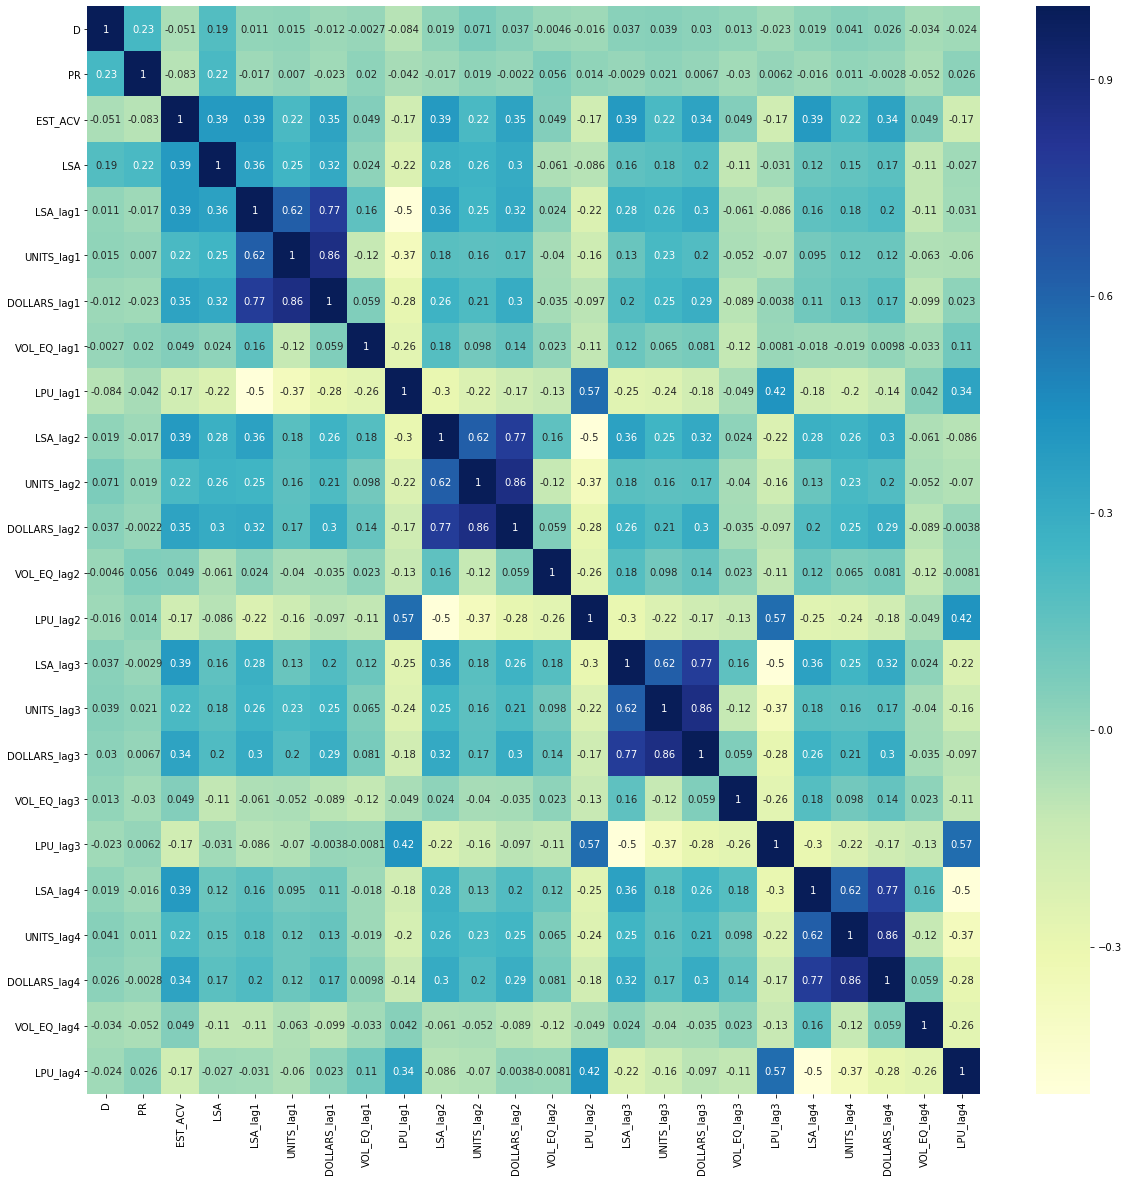

In [280]:
## Checking correlations of some of the values 
df2 = df.dtypes
df2 = df2[df2 != 'O']
df2

## plotting the figures
plt.figure(figsize = (20,20))
sns.heatmap(dfc.corr(),cmap = 'YlGnBu', linecolor = 'blue', annot = True)
plt.show()

As we can see there is lot of correlation between the metrics and their lags. Trend factor is also accounted by the Week 

In [281]:
## Dummifying the columns 
#df14 = df.copy()
dfdummy1 = pd.get_dummies(df['F'])
dfdummy1 = dfdummy1.iloc[:,:-1]
dfdummy2 = pd.get_dummies(df['TYPE'])
dfdummy2 = dfdummy2.iloc[:,:-1]
dfdummy3 = pd.get_dummies(df['TEXTURE'])
dfdummy3 = dfdummy3.iloc[:,:-1]
dfdummy4 = pd.get_dummies(df['FLAVOR'])
dfdummy4 = dfdummy4.iloc[:,:-1]


df15 = pd.concat([df,dfdummy1,dfdummy2,dfdummy3,dfdummy4], axis = 1)

df15 = df15.drop(['F','TYPE','TEXTURE','FLAVOR','UPC'], axis = 1)
df15[:20]

,D,PR,EST_ACV,LSA,LSA_lag1,UNITS_lag1,DOLLARS_lag1,VOL_EQ_lag1,LPU_lag1,LSA_lag2,...,B,C,PEANUT BUTTER,PEANUT BUTTER COMBO,CHUNKY,CREAMY,CRUNCHY,EXTRA CHUNKY,EXTRA CRUNCHY,MISSING
4,0.0,1.0,36.875,6.802395,4.682131,6.0,20.34,1.1250,-1.669542,3.583519,...,0,0,1,0,0,1,0,0,0,0
5,0.0,1.0,36.875,6.416732,6.802395,50.0,99.50,1.1250,-2.202237,4.682131,...,0,0,1,0,0,1,0,0,0,0
6,0.0,0.0,36.875,6.040255,6.416732,34.0,69.66,1.1250,-2.173106,6.802395,...,0,0,1,0,0,1,0,0,0,0
7,0.0,0.0,36.875,5.480639,6.040255,15.0,59.85,1.7500,-1.948413,6.416732,...,0,0,0,0,0,1,0,0,0,0
8,0.0,1.0,36.875,5.375278,5.480639,6.0,31.74,2.5000,-2.023061,6.040255,...,0,0,0,0,0,1,0,0,0,0
9,0.0,0.0,36.875,5.817111,5.375278,12.0,23.88,1.1250,-2.202237,5.480639,...,0,0,0,0,0,1,0,0,0,0
10,0.0,1.0,36.875,6.291569,5.817111,12.0,47.88,1.7500,-1.948413,5.375278,...,0,0,1,0,0,0,0,0,1,0
11,0.0,0.0,36.875,5.123964,6.291569,30.0,60.70,1.1250,-2.185625,5.817111,...,0,0,1,0,0,0,0,0,1,0
12,0.0,0.0,36.875,5.768321,5.123964,6.0,23.94,1.7500,-1.948413,6.291569,...,0,0,1,0,0,0,0,0,1,0
13,0.0,1.0,36.875,6.069536,5.768321,8.0,42.32,2.5000,-2.023061,5.123964,...,0,0,1,0,0,1,0,0,0,0


In [282]:
df = df15.copy()
df[:5]

,D,PR,EST_ACV,LSA,LSA_lag1,UNITS_lag1,DOLLARS_lag1,VOL_EQ_lag1,LPU_lag1,LSA_lag2,...,B,C,PEANUT BUTTER,PEANUT BUTTER COMBO,CHUNKY,CREAMY,CRUNCHY,EXTRA CHUNKY,EXTRA CRUNCHY,MISSING
4,0.0,1.0,36.875,6.802395,4.682131,6.0,20.34,1.125,-1.669542,3.583519,...,0,0,1,0,0,1,0,0,0,0
5,0.0,1.0,36.875,6.416732,6.802395,50.0,99.50,1.125,-2.202237,4.682131,...,0,0,1,0,0,1,0,0,0,0
6,0.0,0.0,36.875,6.040255,6.416732,34.0,69.66,1.125,-2.173106,6.802395,...,0,0,1,0,0,1,0,0,0,0
7,0.0,0.0,36.875,5.480639,6.040255,15.0,59.85,1.750,-1.948413,6.416732,...,0,0,0,0,0,1,0,0,0,0
8,0.0,1.0,36.875,5.375278,5.480639,6.0,31.74,2.500,-2.023061,6.040255,...,0,0,0,0,0,1,0,0,0,0


#### Model Implementation

In [304]:
##Seperating the preditor and dependent variables 
Y = df['LSA']
X = df.copy()
X = X.drop('LSA', axis = 1)

In [305]:
from sklearn.model_selection import train_test_split
X_train,  X_test,Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [306]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [314]:
model = Sequential()
model.add(Dense(units = 35, activation = 'relu'))
model.add(Dense(units = 20, activation = 'relu'))
model.add(Dense(units = 8 , activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [315]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)

In [317]:
model.fit(x= X_train, y = Y_train, epochs = 200, batch_size = 100, validation_data = (X_test, Y_test) )

Train on 30219 samples, validate on 12952 samples
Epoch 1/200
30219/30219 [==============================] - 1s 24us/sample - loss: 28.2930 - val_loss: 1.8961
Epoch 2/200
30219/30219 [==============================] - 0s 14us/sample - loss: 1.4625 - val_loss: 1.1842
Epoch 3/200
30219/30219 [==============================] - 0s 14us/sample - loss: 1.1098 - val_loss: 0.9919
Epoch 4/200
30219/30219 [==============================] - 0s 14us/sample - loss: 0.9491 - val_loss: 0.9538
Epoch 5/200
30219/30219 [==============================] - 0s 15us/sample - loss: 0.8836 - val_loss: 0.8240
Epoch 6/200
30219/30219 [==============================] - 0s 16us/sample - loss: 0.8131 - val_loss: 0.7903
Epoch 7/200
30219/30219 [==============================] - 0s 15us/sample - loss: 0.7745 - val_loss: 0.7767
Epoch 8/200
30219/30219 [==============================] - 0s 15us/sample - loss: 0.7563 - val_loss: 0.7711
Epoch 9/200
30219/30219 [==============================] - 1s 20us/sample - loss: 0.7

30219/30219 [==============================] - 0s 15us/sample - loss: 0.4895 - val_loss: 0.5092
Epoch 150/200
30219/30219 [==============================] - 1s 18us/sample - loss: 0.4863 - val_loss: 0.5396
Epoch 151/200
30219/30219 [==============================] - 0s 16us/sample - loss: 0.4931 - val_loss: 0.5195
Epoch 152/200
30219/30219 [==============================] - 0s 15us/sample - loss: 0.4838 - val_loss: 0.5163
Epoch 153/200
30219/30219 [==============================] - 1s 17us/sample - loss: 0.4839 - val_loss: 0.5283
Epoch 154/200
30219/30219 [==============================] - 1s 17us/sample - loss: 0.4854 - val_loss: 0.5191
Epoch 155/200
30219/30219 [==============================] - 1s 17us/sample - loss: 0.4844 - val_loss: 0.5201
Epoch 156/200
30219/30219 [==============================] - 0s 16us/sample - loss: 0.4832 - val_loss: 0.5142
Epoch 157/200
30219/30219 [==============================] - 0s 15us/sample - loss: 0.4835 - val_loss: 0.5105
Epoch 158/200
30219/3021

In [318]:
losses = pd.DataFrame(model.history.history)

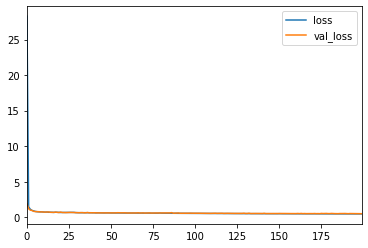

In [319]:
losses.plot()

#### Evaluation

In [321]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [322]:
predictions = model.predict(X_test)

In [323]:
mean_absolute_error(Y_test,predictions)

0.5510682827519706

In [324]:
mean_squared_error(Y_test,predictions )

0.49101065891923923